# Harris Corner Detection

(960, 720, 3)


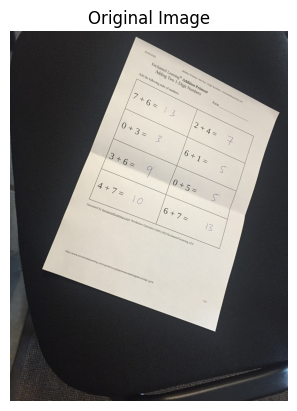

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os

def matplotlib_imshow(image, title = 'image',cmap=None):
    """Display an image using matplotlib."""
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

cwd = os.getcwd()
image_path = os.path.join(cwd, 'images', 'scan.jpg')
image = cv.imread(image_path)
print(image.shape)
matplotlib_imshow(image, title='Original Image')

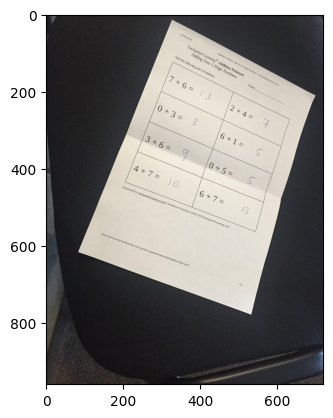

In [2]:
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv.cvtColor(image_copy, cv.COLOR_BGR2RGB)
plt.imshow(image_copy)

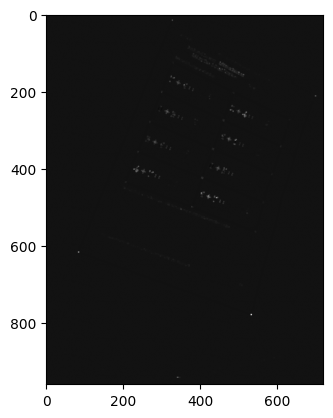

In [3]:
# Convert to grayscale
gray = cv.cvtColor(image_copy, cv.COLOR_RGB2GRAY)
gray = np.float32(gray)


dst = cv.cornerHarris(gray, 2, 3, 0.04)
dst = cv.dilate(dst,None)

plt.imshow(dst, cmap='gray')

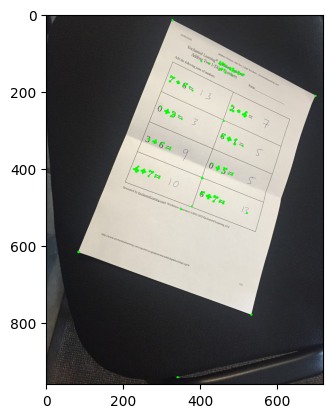

In [4]:
thresh = 0.1*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(image_copy)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv.circle( corner_image, (i, j), 1, (0,255,0), 1)

plt.imshow(corner_image)